In [66]:
%pip install pandas numpy matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [68]:
print("hello world")
movies = pd.read_csv('data/movies.csv')
movies = movies.dropna()
movies

hello world


,Unnamed: 0,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
1,1,524434.0,en,Eternals,3365.535,2021-11-03,7.1,622.0,"['Action', 'Adventure', 'Science Fiction', 'Fa...",The Eternals are a team of ancient aliens who ...,165000000.0,157.0,In the beginning...
2,2,438631.0,en,Dune,2911.423,2021-09-15,8.0,3632.0,"['Action', 'Adventure', 'Science Fiction']","Paul Atreides, a brilliant and gifted young ma...",331116356.0,155.0,"Beyond fear, destiny awaits."
3,3,796499.0,en,Army of Thieves,2552.437,2021-10-27,6.9,555.0,"['Action', 'Crime', 'Thriller']",A mysterious woman recruits bank teller Ludwig...,0.0,127.0,"Before Vegas, one locksmith became a legend."
4,4,550988.0,en,Free Guy,1850.470,2021-08-11,7.8,3493.0,"['Comedy', 'Action', 'Adventure', 'Science Fic...",A bank teller called Guy realizes he is a back...,331096766.0,115.0,Life's too short to be a background character.
5,5,574060.0,en,Gunpowder Milkshake,1453.423,2021-07-14,6.5,347.0,"['Action', 'Thriller', 'Crime']",In her turbulent life as a professional assass...,344931.0,114.0,Revenge is best served ice cold.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10008,9994,28752.0,en,The Curse of the Werewolf,9.017,1961-05-01,6.6,110.0,['Horror'],A child conceived after a demented beggar rape...,0.0,93.0,HALF-MAN... HALF-WOLF... COMPELLED BY THE HIDE...
10010,9996,15934.0,en,El cantante,10.417,2006-09-12,7.0,80.0,"['History', 'Drama', 'Music']","The rise and fall of salsa singer, Héctor Lavo...",0.0,116.0,"Based on the true story of the King of Salsa, ..."
10011,9997,162215.0,en,How I Live Now,9.520,2013-09-10,6.6,705.0,"['Drama', 'Action', 'Thriller', 'War']",An American girl on holiday in the English cou...,0.0,101.0,Love will lead you home
10012,9998,5723.0,en,Once,9.267,2007-03-23,7.4,990.0,"['Drama', 'Music', 'Romance']",A vacuum repairman moonlights as a street musi...,20710513.0,85.0,How often do you find the right person?


https://rich-d-wilkinson.github.io/MATH3030/6.1-classical-mds.html

In [69]:
test_data = np.array([[0, 0], [1, 0], [0, 1], [-1, 0], [0, -1]])

In [70]:
def euclidean_dist(v1, v2):
    return np.sqrt(np.sum((v1 - v2) ** 2))

def distance_matrix(vectors):
    toRet = [[0] * len(vectors) for _ in range(len(vectors))]
    for i in range(len(vectors)):
        for j in range(len(vectors)):
            dist = euclidean_dist(vectors[i], vectors[j])
            toRet[i][j] = dist
            if i != j:
                toRet[j][i] = dist
    return np.array(toRet)

def centering_matrix(n): # dimension of centering matrix
    return np.identity(n) - np.ones((n, n)) / n

In [71]:
print(euclidean_dist(test_data[2], test_data[1]))
test_dmat = distance_matrix(test_data)
print(test_dmat)

1.4142135623730951
[[0.         1.         1.         1.         1.        ]
 [1.         0.         1.41421356 2.         1.41421356]
 [1.         1.41421356 0.         1.41421356 2.        ]
 [1.         2.         1.41421356 0.         1.41421356]
 [1.         1.41421356 2.         1.41421356 0.        ]]


In [72]:
def get_A(distance_matrix):
    return -0.5 * distance_matrix**2

def get_B(distance_matrix):
    A = get_A(distance_matrix)
    H = centering_matrix(len(distance_matrix))
    return H @ A @ H

In [73]:
print(get_A(test_dmat))
test_B = get_B(test_dmat)
print(test_B)

[[-0.  -0.5 -0.5 -0.5 -0.5]
 [-0.5 -0.  -1.  -2.  -1. ]
 [-0.5 -1.  -0.  -1.  -2. ]
 [-0.5 -2.  -1.  -0.  -1. ]
 [-0.5 -1.  -2.  -1.  -0. ]]
[[-8.49320614e-17 -1.66533454e-18 -1.66533454e-18 -1.55431223e-17
   6.66133815e-18]
 [ 3.88578059e-18  1.00000000e+00 -5.16253706e-17 -1.00000000e+00
  -7.10542736e-17]
 [ 2.88657986e-17 -5.44009282e-17  1.00000000e+00 -1.09912079e-16
  -1.00000000e+00]
 [ 5.66213743e-17 -1.00000000e+00 -1.09912079e-16  1.00000000e+00
  -1.01585407e-16]
 [ 9.54791801e-17 -9.88098492e-17 -1.00000000e+00 -9.88098492e-17
   1.00000000e+00]]


In [74]:
def get_mds_points(vectors, new_d=2):
    new_d = 2
    dist_mat = distance_matrix(vectors)
    B = get_B(dist_mat)

    # get eigenvalues and eigenvectors of B
    val, vec = np.linalg.eigh(B)

    # get indices for top new_d eigenvalues
    kept_ind = np.argsort(val)[::-1][:new_d]

    # take only top eigenvalues and corresponding eigenvectors
    V_new = np.array(vec[:, kept_ind])
    lam_new = np.diag(np.sqrt(val[kept_ind]))


    return V_new @ lam_new

In [75]:
mds_pts = get_mds_points(test_data)
print('Generated points:')
print(mds_pts)

print('Dist matrix for og points:')
print(distance_matrix(test_data))
print('Dist matrix for mds points:')
print(distance_matrix(mds_pts))

Generated points:
[[ 4.24805409e-17  0.00000000e+00]
 [-6.20702944e-01  7.84045824e-01]
 [-7.84045824e-01 -6.20702944e-01]
 [ 6.20702944e-01 -7.84045824e-01]
 [ 7.84045824e-01  6.20702944e-01]]
Dist matrix for og points:
[[0.         1.         1.         1.         1.        ]
 [1.         0.         1.41421356 2.         1.41421356]
 [1.         1.41421356 0.         1.41421356 2.        ]
 [1.         2.         1.41421356 0.         1.41421356]
 [1.         1.41421356 2.         1.41421356 0.        ]]
Dist matrix for mds points:
[[0.         1.         1.         1.         1.        ]
 [1.         0.         1.41421356 2.         1.41421356]
 [1.         1.41421356 0.         1.41421356 2.        ]
 [1.         2.         1.41421356 0.         1.41421356]
 [1.         1.41421356 2.         1.41421356 0.        ]]


Now to apply to our dataset

In [80]:
def construct_vec(movie, all_genres, all_lang):
    toRet = []
    toRet.append(movie['popularity'])
    toRet.append(movie['runtime'])
    toRet.append(movie['revenue'])

    for lang in all_lang:
        if lang == movie['original_language']:
            toRet.append(1)
        else:
            toRet.append(0)

    for genre in all_genres:
        if movie['genre'].find(genre) != -1:
            toRet.append(1)
        else:
            toRet.append(0)
    return np.array(toRet)

def sampled_vecs(movies, num=100, rand=False):
    inds = []
    if rand:
        inds = list(range(7071))
        random.shuffle(inds)
        inds = inds[:num]
    else:
        inds = list(range(num))

    sample = movies.iloc[inds]

    #find all genres present in our sample
    all_genres = set()
    for genres in sample['genre']:
        parsed = genres.split('\'')
        for genre in parsed[1::2]:
            all_genres.add(genre)
    all_genres = list(all_genres)

    #find all lagnuages present in our sample
    all_lang = set()
    for lang in sample['original_language']:
        all_lang.add(lang)
    all_lang = list(all_lang)

    mov_data = np.array([construct_vec(movies.iloc[i], all_genres, all_lang) for i in inds])
    #normalize
    normalized_data = (mov_data - mov_data.mean(axis=0)) / mov_data.std(axis=0)
    normalized_data += normalized_data.max(axis=0)
    mov_names = {movies.iloc[inds[i]]['original_title']:i for i in range(len(inds))}
    return normalized_data, mov_names

In [85]:
mov_data, mov_ind = sampled_vecs(movies)

print(mov_data)
print(mov_ind)

[[10.7704442   4.36804104  6.38568842 ...  2.49289081  5.51037759
   1.42398299]
 [ 9.90271194  4.28466557  6.78727219 ...  2.49289081  5.51037759
   1.42398299]
 [ 9.2167496   3.11740894  5.98680343 ...  2.49289081  5.51037759
   1.42398299]
 ...
 [ 4.73713956  1.95015232  5.98680343 ...  2.49289081  5.51037759
   3.87912607]
 [ 4.76912882  2.49209289  6.04700223 ...  5.68890467  5.51037759
   1.42398299]
 [ 4.75031858  1.49158722  6.02943629 ...  2.49289081  5.51037759
   3.87912607]]
{'Eternals': 0, 'Dune': 1, 'Army of Thieves': 2, 'Free Guy': 3, 'Gunpowder Milkshake': 4, 'Venom': 5, 'Halloween Kills': 6, 'American Badger': 7, 'The Addams Family 2': 8, 'Shang-Chi and the Legend of the Ten Rings': 9, 'Snake Eyes: G.I. Joe Origins': 10, 'The Vault': 11, 'The Deep House': 12, 'I onde dager': 13, 'Zone 414': 14, '劇場版「鬼滅の刃」無限列車編': 15, 'The Protégé': 16, 'The Suicide Squad': 17, 'Deathstroke: Knights & Dragons - The Movie': 18, 'The Boss Baby: Family Business': 19, 'Ripper Untold': 20, 'F

In [86]:
inf_pts = get_mds_points(mov_data)

print(inf_pts)

inf_dist = distance_matrix(inf_pts)

[[-0.99326331  4.31032663]
 [-1.45252992  3.61018955]
 [-2.52357426  0.84139175]
 [ 0.01462636  2.29195808]
 [-2.16135593  0.17628726]
 [-1.03383537  1.79776237]
 [-1.31935483 -1.43576133]
 [-1.28535997 -0.34187987]
 [ 2.89448758 -0.96113752]
 [-0.23254437  2.7925734 ]
 [-0.6130407   1.51527897]
 [-2.11274174  0.06823837]
 [-0.44315481 -1.49180996]
 [-0.94097968 -1.19605935]
 [-1.18774011 -1.20431869]
 [ 1.82015626  3.12536423]
 [-1.97975393 -0.15587498]
 [-0.10683064  2.33579026]
 [ 0.79062005  1.34812566]
 [ 3.15102453  0.06715828]
 [-0.40670921 -1.56296396]
 [-2.31981694  0.97808276]
 [-0.75997131  2.3639482 ]
 [-0.59399962 -1.26802626]
 [ 3.3894586  -0.32353023]
 [-0.06454709 -1.58236884]
 [-1.42126408 -2.41197366]
 [ 5.17302083  1.54550581]
 [ 2.69264985 -0.2664417 ]
 [-2.01953109 -0.03247477]
 [-1.3485168  -0.7531282 ]
 [-0.96266429 -2.15157119]
 [-0.17186267 -0.3886976 ]
 [-0.24466426 -0.22227771]
 [ 0.17810557  1.78213836]
 [-1.17424898 -1.81241728]
 [-0.73860592  2.00196123]
 

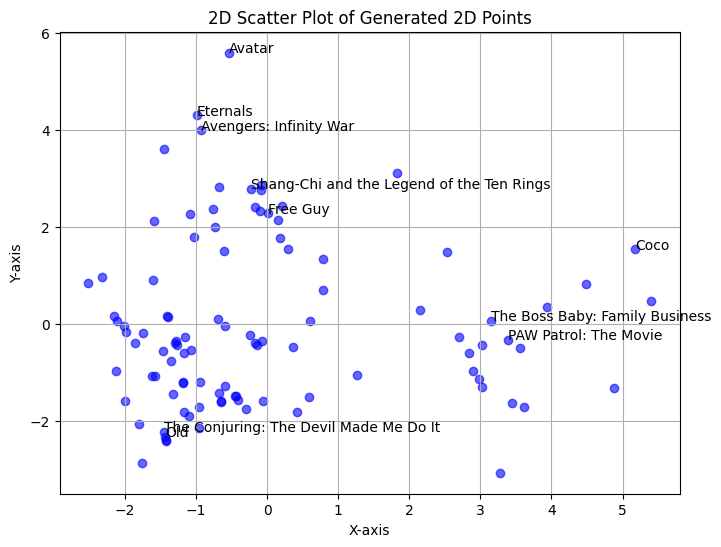

In [96]:
x = inf_pts[:, 0]
y = inf_pts[:, 1]

movs_to_show = ["Avatar", "Coco", "Avengers: Infinity War", "Eternals", "Free Guy", 
                "The Boss Baby: Family Business", "PAW Patrol: The Movie", "Shang-Chi and the Legend of the Ten Rings", "Old",
                "The Conjuring: The Devil Made Me Do It"]

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.6, label='Random Points')
plt.title("2D Scatter Plot of Generated 2D Points")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
for mov in movs_to_show:
    plt.annotate(mov, (x[mov_ind[mov]], y[mov_ind[mov]]))
plt.grid(True)
plt.show()